<a href="https://colab.research.google.com/github/skylarsepanek/Stats_Sepanek/blob/main/SKYLAR_SEPANEK_Lab_Linear_Model_Photo_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://tensorspace.org/

In [88]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [89]:
def GPU(data):  #gpu is fast chip
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x): #plot command
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):  #google slide data
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [90]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

In [91]:
url = "https://docs.google.com/presentation/d/1lyE52a0yLCu9iUiKeFmdKayGJhu2Z6fyToXEMKeigoY/edit#slide=id.p" #url to slide

In [92]:
url= "https://docs.google.com/presentation/d/1yPnEwhSzoZ4Oy6XydqnFZq_tBnHHv9HHjBJE9LMP_JM/edit#slide=id.p"

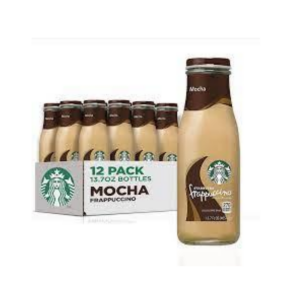

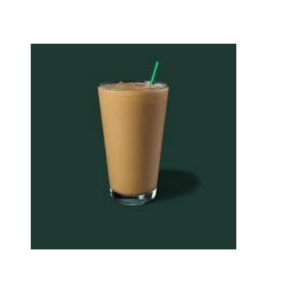

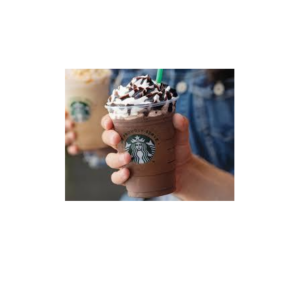

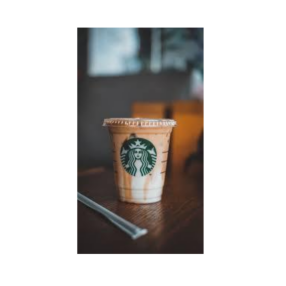

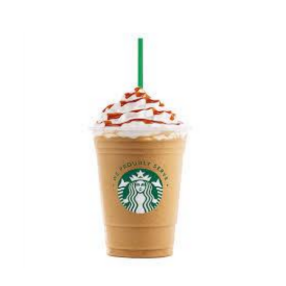

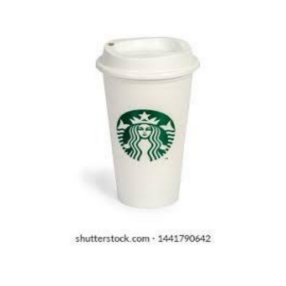

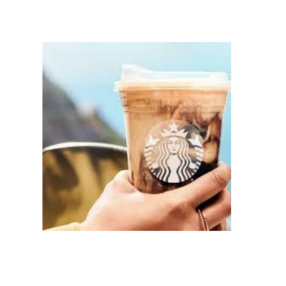

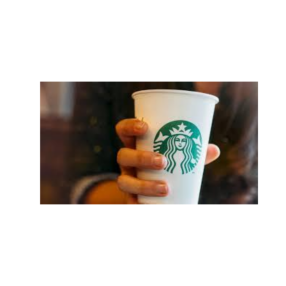

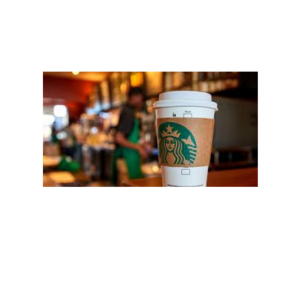

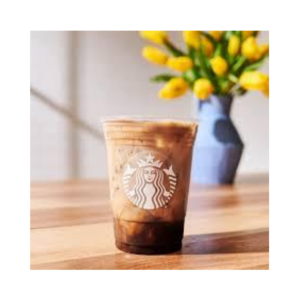

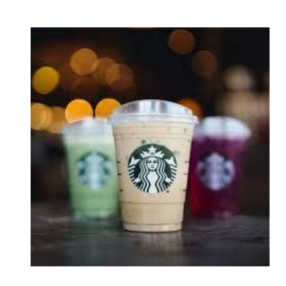

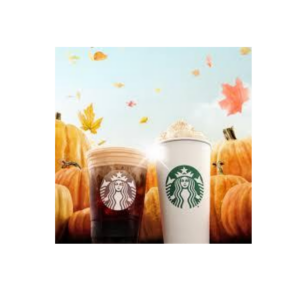

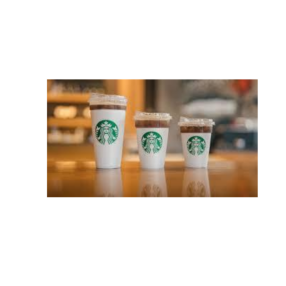

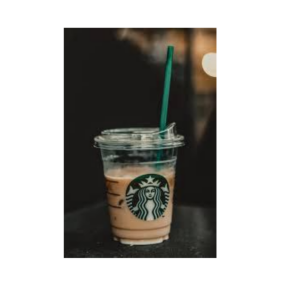

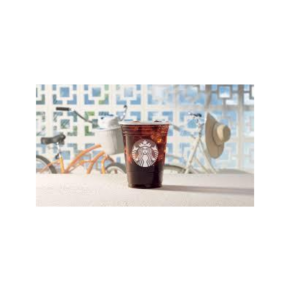

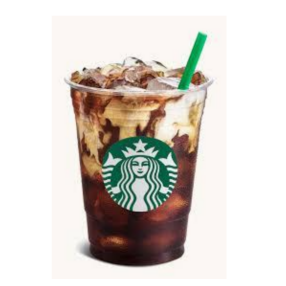

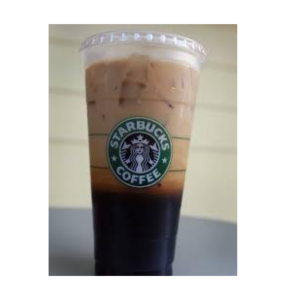

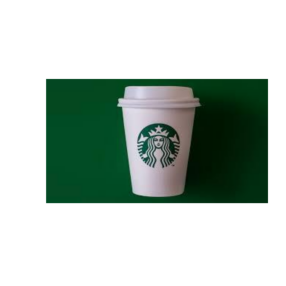

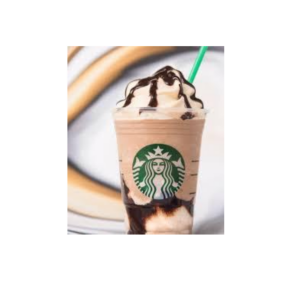

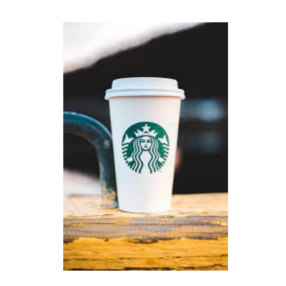

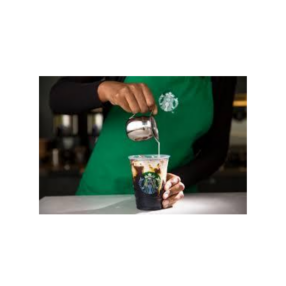

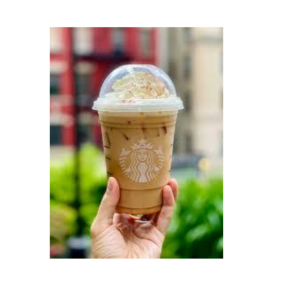

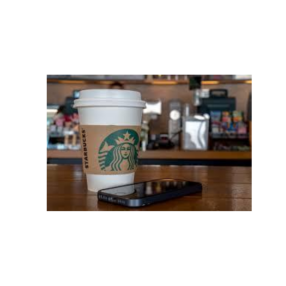

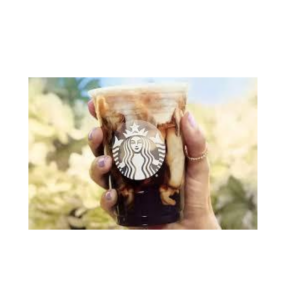

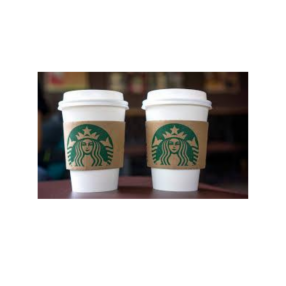

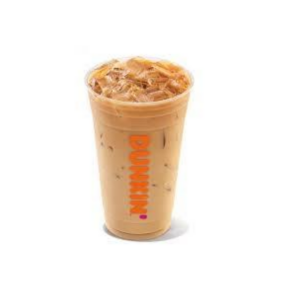

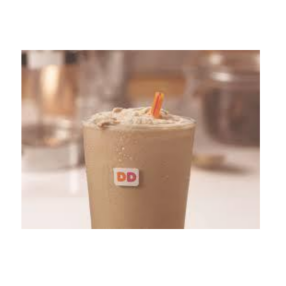

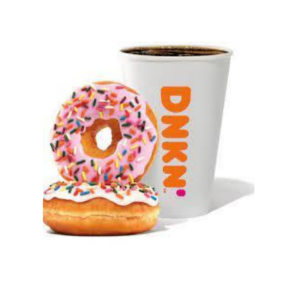

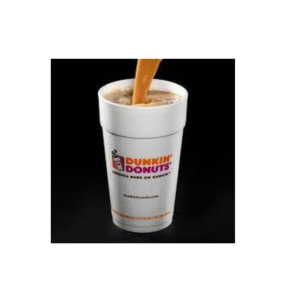

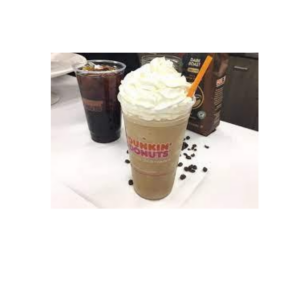

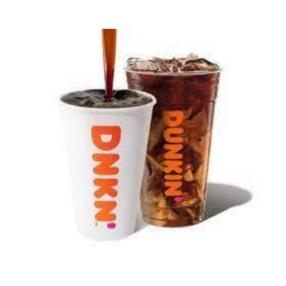

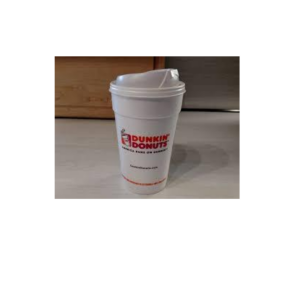

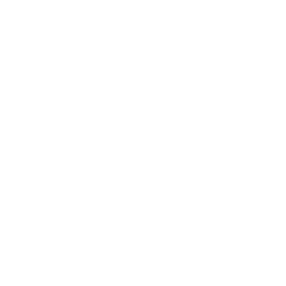

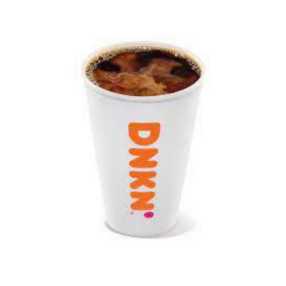

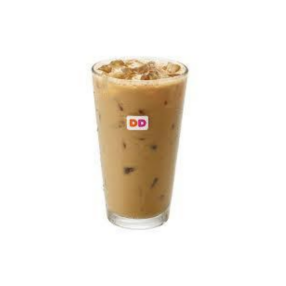

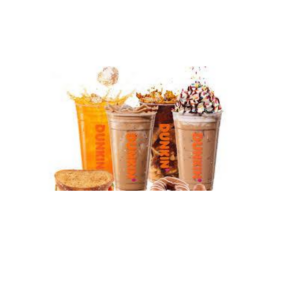

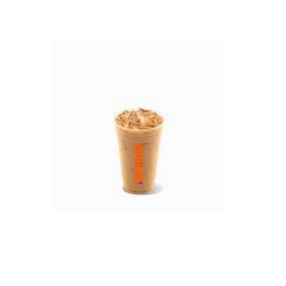

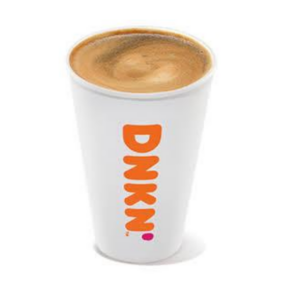

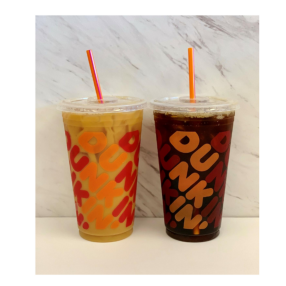

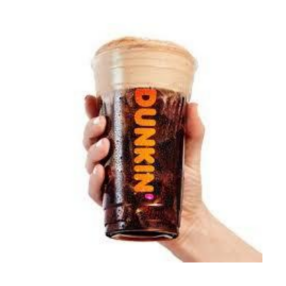

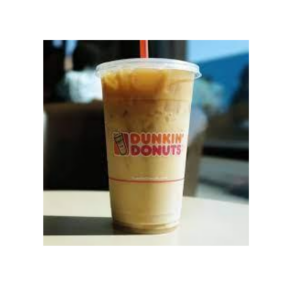

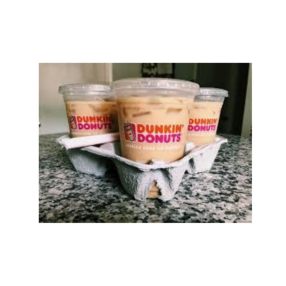

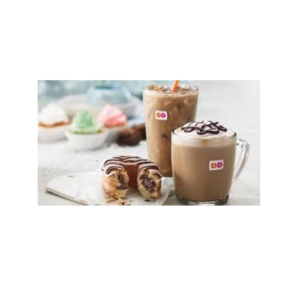

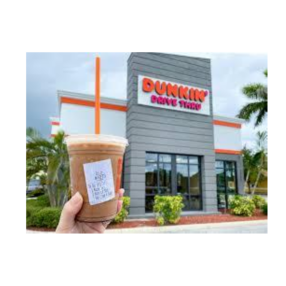

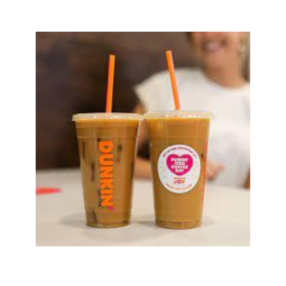

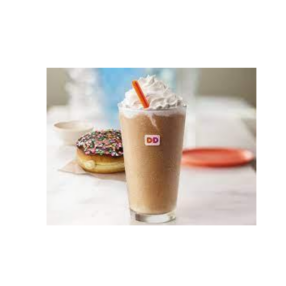

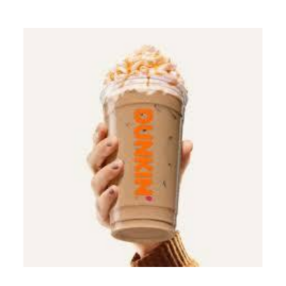

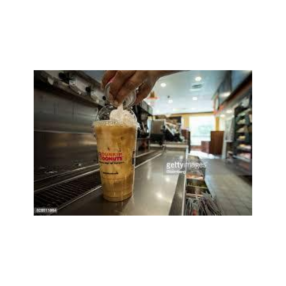

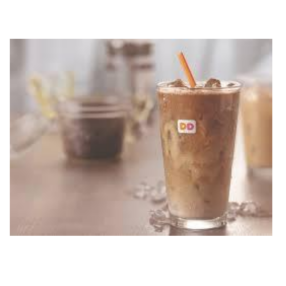

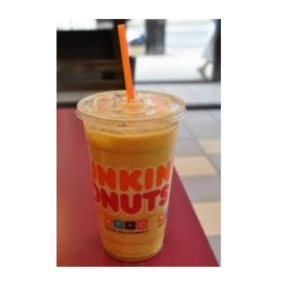

In [93]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [94]:
images.shape #how many images brought in 

torch.Size([50, 3, 224, 224])

In [95]:
model(images)

tensor([[-1.3192, -1.6514, -5.1129,  ..., -2.2766,  3.2824,  4.4320],
        [-3.8213, -0.6258, -2.6338,  ...,  0.5720,  1.1643,  8.3899],
        [-2.8742, -2.9640, -2.4689,  ..., -1.9502, -0.0620,  2.3081],
        ...,
        [-1.0075, -1.4339, -2.7515,  ..., -4.0285,  1.4515, -0.8206],
        [-0.5290,  4.3052, -2.5833,  ..., -3.2897,  0.3385,  0.8976],
        [-4.6073,  4.3057, -3.7883,  ..., -4.0793,  0.8461,  4.5504]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [96]:
y = model(images)

In [97]:
y.shape #1000 numbers 

torch.Size([50, 1000])

In [98]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [99]:
for i in list(guesses):
    print(labels[i])

lighter, light, igniter, ignitor
lampshade, lamp shade
web site, website, internet site, site
perfume, essence
candle, taper, wax light
eggnog
Band Aid
web site, website, internet site, site
web site, website, internet site, site
table lamp
thimble
nipple
Band Aid
perfume, essence
mousetrap
hamper
analog clock
envelope
analog clock
lotion
binder, ring-binder
eggnog
entertainment center
eggnog
thimble
eggnog
eggnog
toaster
lotion
power drill
candle, taper, wax light
sunscreen, sunblock, sun blocker
letter opener, paper knife, paperknife
cup
candle, taper, wax light
perfume, essence
whistle
eggnog
wallet, billfold, notecase, pocketbook
pill bottle
lotion
eggnog
pencil sharpener
web site, website, internet site, site
pill bottle
sunscreen, sunblock, sun blocker
quill, quill pen
mousetrap
eggnog
perfume, essence


In [100]:
Y = np.zeros(50,) #answer key
Y[25:] = 1

In [101]:
Y #answer key printed

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [102]:
X = y.detach().cpu().numpy() 

In [103]:
X.shape

(50, 1000)

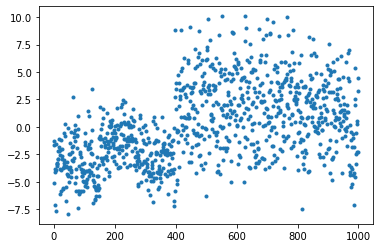

In [104]:
plt.plot(X[0],'.') 

In [108]:
X[0] #how much of each catagory

array([-1.31923294e+00, -1.65142989e+00, -5.11286926e+00, -7.09987545e+00,
       -3.81644559e+00, -4.13513660e+00, -7.68556643e+00, -3.90156460e+00,
       -1.57110870e+00, -3.33419347e+00, -3.42823601e+00, -3.53777266e+00,
       -3.39116073e+00, -2.16673183e+00, -2.95110393e+00, -2.96117187e+00,
       -1.10890269e+00, -1.87836123e+00, -2.21556258e+00, -2.11430693e+00,
       -6.14610195e+00, -3.80549788e+00, -2.53496766e+00, -3.94434595e+00,
       -5.84731340e+00, -1.22287464e+00, -2.95574450e+00, -2.05461311e+00,
       -2.61653066e+00, -3.73754072e+00, -5.70438623e+00, -5.55685329e+00,
       -3.04967165e+00, -3.59903288e+00, -3.31475496e+00, -6.00181282e-01,
       -8.11732590e-01, -3.61586261e+00,  2.78615475e-01, -5.51115513e+00,
       -6.80533600e+00, -3.58529234e+00, -4.33671284e+00, -3.69408083e+00,
       -3.18752146e+00, -1.02465220e-01, -4.51167059e+00, -4.35539007e+00,
       -7.93882608e+00, -4.99802017e+00, -3.84780502e+00, -2.44556284e+00,
       -2.49488640e+00, -

In [126]:
np.argmax(X[0])

626

In [127]:
labels[626]

'lighter, light, igniter, ignitor'

In [128]:
top_ten = np.argsort(X[0])[::-1][0:10]  #gives us top ten

In [129]:
top_ten

array([626, 551, 767, 507, 699, 720, 447, 631, 674, 398])

In [130]:
for i in top_ten:   #prints top 10 labels
  print(labels[i])

lighter, light, igniter, ignitor
face powder
rubber eraser, rubber, pencil eraser
combination lock
panpipe, pandean pipe, syrinx
pill bottle
binoculars, field glasses, opera glasses
lotion
mousetrap
abacus


(array([ 18.,  72., 181., 198., 177., 125., 114.,  72.,  22.,  21.]),
 array([-7.938826 , -6.136442 , -4.334059 , -2.5316749, -0.7292911,
         1.0730927,  2.8754764,  4.6778603,  6.480244 ,  8.282628 ,
        10.0850115], dtype=float32),
 <a list of 10 Patch objects>)

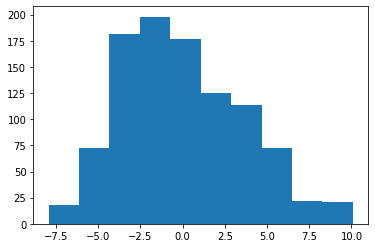

In [131]:
plt.hist(X[0])

In [132]:
X = GPU_data(X)
Y = GPU_data(Y)

In [133]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [134]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [135]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [136]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [137]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [138]:
X.shape

torch.Size([50, 1000])

In [139]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [140]:
def model(x,w):

    return x@w[0]

In [141]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [144]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


acc_train,▁▂▃▂▃▂▁▃▃▃▁▁▁▆▆▅▆▅▄▇▅▅▇▆▅▅▇▅█▅▇▅▅▇▄█▆▅▆▅
loss,█▇▆▇▆▇█▆▆▆███▃▃▄▃▄▅▂▄▄▂▃▄▄▂▄▁▄▂▄▄▂▅▁▃▄▃▄
acc_train,0.5625
loss,0.75076


<ipython-input-89-100a15c1a0f5>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))
